In [14]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(r'C:\Users\takea\Desktop\DeepLearning\datasets\week3\HAR_Dataset\UCI_HAR_Dataset\features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(r'C:\Users\takea\Desktop\DeepLearning\datasets\week3\HAR_Dataset\UCI_HAR_Dataset\train\X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv(r'C:\Users\takea\Desktop\DeepLearning\datasets\week3\HAR_Dataset\UCI_HAR_Dataset\test\X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(r'C:\Users\takea\Desktop\DeepLearning\datasets\week3\HAR_Dataset\UCI_HAR_Dataset\train\y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(r'C:\Users\takea\Desktop\DeepLearning\datasets\week3\HAR_Dataset\UCI_HAR_Dataset\test\y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

print("## 학습 피처 데이터 정보 ##")
print(X_train.info())

## 학습 피처 데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [16]:
print(X_train)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322 

In [17]:
print(y_train)

      action
0          5
1          5
2          5
3          5
4          5
...      ...
7347       2
7348       2
7349       2
7350       2
7351       2

[7352 rows x 1 columns]


In [18]:
unique_labels = y_train.action.drop_duplicates()
print(unique_labels)

0      5
27     4
51     6
78     1
125    3
150    2
Name: action, dtype: int64


# Random Forest

랜덤 포레스트의 개요

배깅의 대표적인 알고리즘
랜덤 포레스트는 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링 된 데이터 세트
부트스트래핑 부할 방식 채택
참고 강의 이론

https://www.youtube.com/watch?v=Z97uDTsvojY

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

간단한 랜덤포레스트 모형을 만들어 학습 시킨다.

매우 간단한 모형이기 때문에 학습에 시간이 많이 걸리지는 않는다.

In [7]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)# Random Forest
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


# 하이퍼 파라미터 및 튜닝

- 튜닝이란, 모형이 가지고 있는 여러 조건들을 변형 시키는 것
- 대표적인 파라미터 소개
    - n_estimators: 결정 트리의 개수 지정, 디폴트는 10개이며, 많이 설정할수록 좋은 성능 기대 가능, 그러나 시간도 오래 소요됨
    - max_features: 최적의 분할을 위해 고려할 피처의 개수
        - int 형으로 지정 시, 대상 피처의 개수, float형으로 지정 시, 대상 피처의 퍼센트
        - 만약 전체 피처가 16개라면 분할 위해 4개 참조
    - max_depth: 트리의 최대 깊이 규정
    - min_samples_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
    - min_samples_leaf: 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수

# 그리드 서치

- GridSearchCV API를 활용하여 모형에 사용되는 하이퍼 파라미터를 순차적으로 입력하며서 편리하게 최적의 파라미터를 도출할 수 있는 방안 제공
- 즉, 랜덤포레스트의 파라미터를 순차적으로 변경 및 조정하면서 모형을 학습시키는 방법
- 이를 통해, 머신러닝 모형 개발자의 코드량을 줄여주는 매우 편리한 기법
    - estimator: 머신러닝 모형의 객체가 온다.
    - param_grid: 딕셔너리 형태로 조정하며, estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정, 이 부분은 각 머신러닝 모형의 Manual을 참조한다.
    - scoring: 예측 성능을 측정할 평가 방법 지정하지만, 대개 별도의 성능 평가 지표 함수 활용
    - cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- 이 때에는 시간이 다소 소요될 수 있다. (5-10분)

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 ) # n_job=-1 현재 모든 CPU를 활용한다는 뜻. 
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


# (옵션 체크) 구글 코랩 개발환경 확인

In [9]:
!cat /proc/cpuinfo

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 모형의 개수 심기

- 최적의 파라미터를 활용하여 n_estimators의 개수를 100개에서 300개로 늘려봅니다.

In [10]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


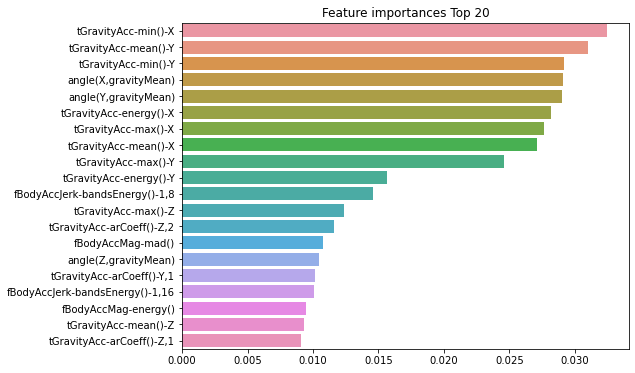

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# Logistic Regression

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [37]:
# 데이터 스케일링 (Feature Scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# 로지스틱 회귀 모델 생성
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.9545300305395318


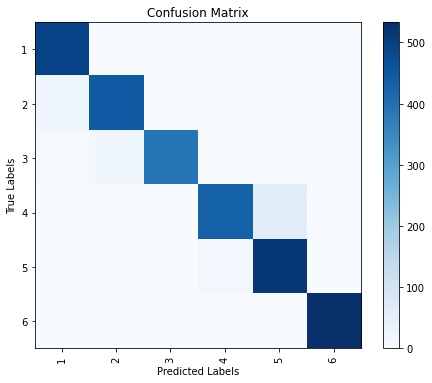

In [42]:
# 테스트 데이터로 예측
y_pred = classifier.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 혼동 행렬 (Confusion Matrix) 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# 고유한 클래스 레이블로 xticks 및 yticks 설정
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test), rotation=90)
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.show()

# Decision Tree

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Decision Tree 분류 모델 생성
clf = DecisionTreeClassifier(random_state=42)

# 모델을 학습용 데이터에 적합
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.8622327790973872


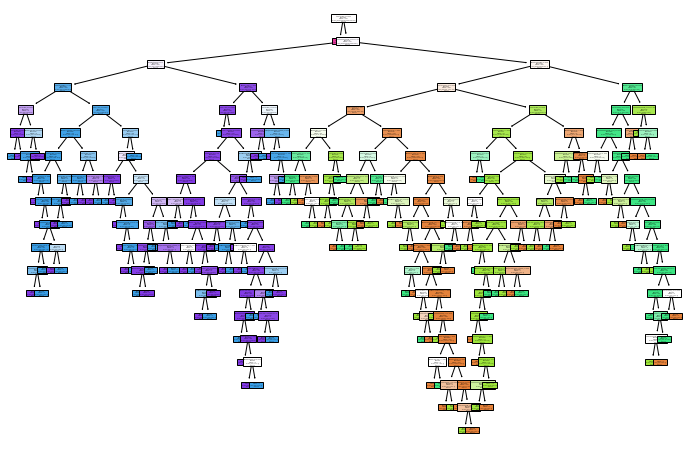

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Decision Tree 모델 시각화
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=[str(i) for i in range(1, 7)])  # 클래스 이름은 적절히 수정해야 할 수 있습니다.
plt.show()

# Support Vector Machine

In [19]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
# SVM 모델 생성
svm = SVC(kernel='rbf', C=1.0, random_state=42)  # 여기서 'rbf'는 Radial Basis Function 커널을 사용하는 것을 의미합니다.

# SVM 모델 학습
svm.fit(X_train, y_train)

# SVM 모델로 예측
y_pred = svm.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.9504580929759077


In [ ]:
# 주성분 분석 (PCA)을 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# SVM 모델을 2차원 데이터에 적합
svm.fit(X_train_pca, y_train)

# 결정 경계 그리기
h = .02  # 결정 경계를 그릴 mesh의 단위
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 예측
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# 클래스 레이블에 대한 색상 매핑
color_mapping = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'cyan'
}

# 클래스 레이블을 색상으로 변환
colors = [color_mapping[label] for label in y_train]

# 결과 시각화
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=colors, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.show()

# Linear SVM

In [21]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [22]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [23]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.9640312181879878


In [ ]:
# 2차원 데이터로 시각화하기 위해 주성분 분석 (PCA) 사용
from sklearn.decomposition import PCA

# 주성분 분석을 위해 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# SVM 모델을 2차원 데이터에 적합
svm.fit(X_train_pca, y_train)

# 결정 경계 그리기
h = .02  # 결정 경계를 그릴 mesh의 단위
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 예측
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 클래스 레이블에 대한 색상 매핑
color_mapping = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'cyan'
}

# 클래스 레이블을 색상으로 변환
colors = [color_mapping[label] for label in y_train]

# 결과 시각화
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=colors, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.show()